# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [5]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [6]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [7]:
df_airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

Primeras filas del DataFrame:
   room_id  host_id        room_type       neighborhood  reviews  \
0     6499    14455  Entire home/apt              Belém        8   
1    17031    66015  Entire home/apt           Alvalade        0   
2    25659   107347  Entire home/apt  Santa Maria Maior       63   
3    29248   125768  Entire home/apt  Santa Maria Maior      225   
4    29396   126415  Entire home/apt  Santa Maria Maior      132   

   overall_satisfaction  accommodates  bedrooms  price  
0                   5.0             2       1.0   57.0  
1                   0.0             2       1.0   46.0  
2                   5.0             3       1.0   69.0  
3                   4.5             4       1.0   58.0  
4                   5.0             4       1.0   67.0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                -----

<Axes: title={'center': 'Puntuación media por barrio'}, xlabel='neighborhood', ylabel='Frequency'>

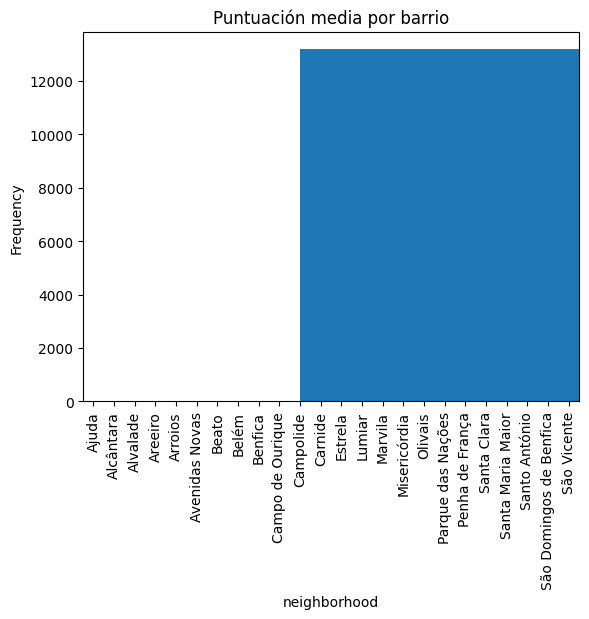

In [8]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_airbnb = pd.read_csv("./data/airbnb.csv")

# Ver las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df_airbnb.head())

# Ver la información general del DataFrame
print("\nInformación del DataFrame:")
print(df_airbnb.info())

# Ver estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df_airbnb.describe())

# Contar el número de entradas únicas en cada columna
print("\nNúmero de entradas únicas en cada columna:")
print(df_airbnb.nunique())

# Filtrar propiedades en un barrio específico (por ejemplo, "Baixa")
baixa_properties = df_airbnb[df_airbnb['neighborhood'] == 'Baixa']
print("\nPropiedades en el barrio de Baixa:")
print(baixa_properties.head())

# Calcular el precio promedio por tipo de habitación
avg_price_by_room_type = df_airbnb.groupby('room_type')['price'].mean()
print("\nPrecio promedio por tipo de habitación:")
print(avg_price_by_room_type)

# Crear un histograma del precio de las propiedades
df_airbnb['price'].plot.hist(title='Histograma del precio de las propiedades')

# Crear un gráfico de barras de la puntuación media por barrio
avg_satisfaction_by_neighborhood = df_airbnb.groupby('neighborhood')['overall_satisfaction'].mean()
avg_satisfaction_by_neighborhood.plot.bar(title='Puntuación media por barrio')


## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [2]:
# Filtrar propiedades con más de 10 críticas y una puntuación mayor de 4
filtered_properties = df_airbnb[(df_airbnb['reviews'] > 10) & (df_airbnb['overall_satisfaction'] > 4)]

# Ordenar las propiedades por puntuación media y número de críticas en orden descendente
sorted_properties = filtered_properties.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Seleccionar las tres mejores alternativas
top_3_alternatives = sorted_properties.head(3)

# Mostrar las alternativas seleccionadas
print("Las tres mejores alternativas de alojamiento para Alicia y su familia en Lisboa son:")
print(top_3_alternatives[['room_id', 'neighborhood', 'overall_satisfaction', 'reviews']])


Las tres mejores alternativas de alojamiento para Alicia y su familia en Lisboa son:
     room_id   neighborhood  overall_satisfaction  reviews
120   176153   Misericórdia                   5.0      438
931  1085634   Misericórdia                   5.0      379
212   299321  Santo António                   5.0      337


### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [18]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.9 MB/s eta 0:00:00:00:01


In [20]:

import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Cargar el archivo CSV en un DataFrame
df_airbnb = pd.read_csv("./data/airbnb.csv")

# Filtrar las propiedades de Roberto y Clara
roberto_property = df_airbnb[df_airbnb['host_id'] == 97503]
clara_property = df_airbnb[df_airbnb['host_id'] == 90387]

# Concatenar los DataFrames de Roberto y Clara
roberto_clara_properties = pd.concat([roberto_property, clara_property])

# Crear un nuevo libro de trabajo de Excel
wb = Workbook()
ws = wb.active

# Escribir el DataFrame en el libro de trabajo de Excel
for row in dataframe_to_rows(roberto_clara_properties, index=False, header=True):
    ws.append(row)

# Guardar el archivo Excel
wb.save("roberto.xls")

print("El DataFrame con las propiedades de Roberto y Clara ha sido guardado como 'roberto.xls'")





El DataFrame con las propiedades de Roberto y Clara ha sido guardado como 'roberto.xls'



### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [21]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_airbnb = pd.read_csv("./data/airbnb.csv")

# Filtrar propiedades dentro del presupuesto de Diana
budget_properties = df_airbnb[df_airbnb['price'] <= 50]

# Filtrar propiedades que sean habitaciones compartidas (Shared room)
shared_rooms = budget_properties[budget_properties['room_type'] == 'Shared room']

# Ordenar las habitaciones compartidas por precio y puntuación media en orden ascendente
sorted_shared_rooms = shared_rooms.sort_values(by=['price', 'overall_satisfaction'], ascending=[True, False])

# Si hay menos de 10 habitaciones compartidas, completamos con viviendas completas (Entire home/apt)
if len(sorted_shared_rooms) < 10:
    remaining_properties = budget_properties[budget_properties['room_type'] == 'Entire home/apt']
    sorted_remaining_properties = remaining_properties.sort_values(by=['price'], ascending=True)
    # Agregamos las viviendas completas restantes al DataFrame de habitaciones compartidas
    sorted_shared_rooms = pd.concat([sorted_shared_rooms, sorted_remaining_properties.head(10 - len(sorted_shared_rooms))])

# Tomar las primeras 10 propiedades
top_10_properties = sorted_shared_rooms.head(10)

# Mostrar las 10 propiedades más baratas para Diana
print("Las 10 propiedades más baratas para Diana en Lisboa son:")
print(top_10_properties[['room_id', 'neighborhood', 'room_type', 'price', 'overall_satisfaction']])


Las 10 propiedades más baratas para Diana en Lisboa son:
        room_id       neighborhood    room_type  price  overall_satisfaction
1010    1179457      Santo António  Shared room   10.0                   4.0
3562    5557699  Santa Maria Maior  Shared room   10.0                   4.0
7584   13116032            Arroios  Shared room   10.0                   0.0
13148  19314160        Santa Clara  Shared room   10.0                   0.0
9065   14933182      Santo António  Shared room   11.0                   5.0
4353    6728244  Santa Maria Maior  Shared room   11.0                   4.5
5616    9317561            Arroios  Shared room   11.0                   4.5
6640   11693356  Santa Maria Maior  Shared room   11.0                   4.5
6641   11693442  Santa Maria Maior  Shared room   11.0                   4.5
8908   14708916      Santo António  Shared room   11.0                   4.5
